Deep Learning

In [ ]:
"""
problem : hand didgit should be classify by using of NN and Tensorflow library
"""

'\nproblem : hand didgit should be classify by using of NN and Tensorflow library\n'

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


#Over view of NN model in DL

```
problem : hand didgit should be classify by using of NN and Tensorflow library
```



## Mnist dataset

### Import library

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from tensorflow import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns

### Mnist dataset load

In [ ]:
# import keras inbuild data set
data= keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=data.load_data()


### Data visualization

In [ ]:
# X_train[0]

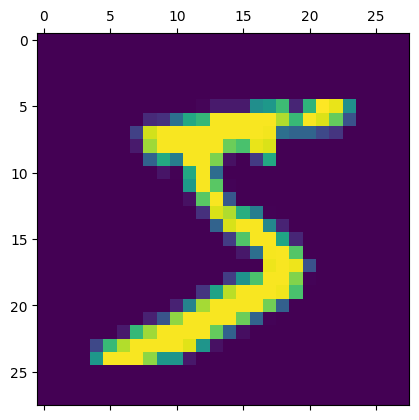

In [ ]:
plt.matshow(X_train[0])

### Data reashaping 1D into 2D

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# image are in 2 dia array it convert as one dia by using of reshape method
X_train_reshaped=X_train.reshape(len(X_train),28*28)
X_test_reshaped=X_test.reshape(len(X_test),28*28)

In [ ]:
X_test_reshaped.shape

(10000, 784)

### Build model ANN

In [ ]:
# build model NN
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])


In [ ]:
# compile the model
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
#predict the model
model.fit(X_train_reshaped,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 9.7622 - accuracy: 0.8419
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 6.0261 - accuracy: 0.8790
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6351 - accuracy: 0.8842
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 5.5106 - accuracy: 0.8844
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3926 - accuracy: 0.8854
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2367 - accuracy: 0.8896


In [ ]:
# model evaluate
model.evaluate(X_test_reshaped,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.3737 - accuracy: 0.8914


[5.373741149902344, 0.8913999795913696]

In [ ]:
# model prediction
predicted=model.predict(X_test_reshaped)

313/313 [==============================] - 0s 1ms/step


# Activation ,loss and GD

### Activation function

In [ ]:
# activation function
import numpy as np
import math
def sig_math(x):
  sig=1/(1+math.exp(x))
  return sig

def sig_np(x):
  sig=1/(1+np.exp(x))
  return sig

def relu(x):
  relu= max(0,x)
  return relu
def leaky_relu(x):
  leaky_relu=max((0.1*x),x)
  return leaky_relu


def tanh(x):
  tanh=(math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))
  return tanh

In [ ]:
tanh(np.array(8))

0.999999774929676

### Loss function

In [ ]:
# loss function
# abs
def abs(y,yp):
  err=np.abs([(i-j) for i,j in zip(y,yp)])
  print(err)
  abs_lf=err/len(y)
  return abs_lf
  
# mse 
def mse(y,yp):
  err=np.array([(i-j)**2 for i,j in zip(y,yp)])
  print(err)
  mse=err/len(y)
  return mse

#log loss
def logloss(y,yp):
  ep=0.00000000000000000000000001
  ypn=[max(i,ep) for i in yp] 
  yp=[min(i,1-ep) for i in ypn]
  yp=np.array(yp)
  err=-np.mean(y*np.log(yp)+(1-y)*np.log(1-yp))
  return err

In [ ]:
y=np.array([1,1,0])
yp=np.array([0.99,0.01,0.99])
logloss(y,yp)

3.073463569276561

### GD with Sigmoid

In [ ]:
# gradient decent with sigmoid
def gd(x1,x2,y,epoch):
  m1=m2=b=0
  lr=0.05
  for i in range(epoch):
    yval=m1*x1+m2*x2+b
    yp=sig_np(yval)
    dm1=1/len(y)*np.dot(x1,(y-yp))
    dm2=1/len(y)*np.dot(x2,(y-yp))

    db=np.mean(y-yp)
    m1=m1-lr*dm1
    m2=m2-lr*dm2
    b=b-lr*db
    print(f"epoch val : {i} weight {i}: {m1}   weight {i}:{m2}  bias :{b}")
  




In [ ]:
x1=np.array([2,4,7,9])
y=np.array([4,8,14,20])
x2=np.array([2,3,4,5])
gd(x1,x2,y,5)

epoch val : 0 weight 0: -3.8375000000000004   weight 0:-2.2625  bias :-0.55
epoch val : 1 weight 1: -7.537500072564813   weight 1:-4.43750007256306  bias :-1.0750000362806533
epoch val : 2 weight 2: -11.237500072565151   weight 2:-6.612500072563398  bias :-1.6000000362808227
epoch val : 3 weight 3: -14.93750007256515   weight 3:-8.787500072563398  bias :-2.125000036280823
epoch val : 4 weight 4: -18.63750007256515   weight 4:-10.9625000725634  bias :-2.6500000362808227


# Toy dataset NN

In [ ]:
## simple nn network

### Import library

In [ ]:
# import library

import pandas as pd
import numpy as np
from tensorflow import keras
import math

from sklearn.model_selection import train_test_split


### Load dataset

In [ ]:
# create toy set
dict_data={
    "x1":np.random.randint(0,20,10),
    "x2":np.random.randint(0,2,10),
    "y":np.random.randint(0,2,10)
}
print(dict_data)

{'x1': array([13, 19, 10, 19, 11,  4, 13,  8, 13, 11]), 'x2': array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1]), 'y': array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1])}


In [ ]:
data=pd.DataFrame(dict_data)
data.head()

,x1,x2,y
0,13,1,1
1,19,0,1
2,10,0,1
3,19,1,1
4,11,1,0


### Independent and Dependent var

In [ ]:
# dependent and independent var
x=data.iloc[:,:2].values
y=data.iloc[:,-1].values


### Data split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Simple NN model

In [ ]:
# build simple nn model
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation="sigmoid",bias_initializer="zeros")
])

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,epochs=700)

In [ ]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 185ms/step


In [ ]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 416ms/step - loss: 0.2861 - accuracy: 1.0000


[0.28607192635536194, 1.0]

In [ ]:
coef,intercept=model.get_weights()

In [ ]:
coef

array([[ 0.12909687],
       [-1.1380699 ]], dtype=float32)

In [ ]:
intercept

array([-0.06665523], dtype=float32)

# Simple NN in insurance buy


```
by using insurance dataset classify the person will buy or not
```




In [ ]:
# predict if the preson buy insurance or not

### Import library

In [ ]:
# import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

### Load dataset

In [ ]:
# load data
data=pd.read_excel("/content/insurance_data.xlsx")
data.head()

,age,affordibility,bought_insurance
0,22,1,1
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


### X Y split

In [ ]:
# X Y split
X_data=data.iloc[:,:2].values
y_data=data.iloc[:,-1].values

In [ ]:
# train test split 
X_train,X_test,y_train,y_test=train_test_split(data[['age','affordibility']],data['bought_insurance'],test_size=0.22,random_state=42)

In [ ]:
X_train.head()

,age,affordibility
22,40,1
11,28,1
13,29,0
15,55,1
1,25,0


In [ ]:
X_train_scal=X_train.copy()
X_train_scal["age"]=X_train_scal["age"]/100

X_test_scal=X_test.copy()
X_test_scal["age"]=X_test_scal["age"]/100

X_train_scal.head()

,age,affordibility
22,0.40,1
11,0.28,1
13,0.29,0
15,0.55,1
1,0.25,0


### Model build ANN

In [ ]:
# model keras
model=keras.Sequential([
    keras.layers.Dense(1,activation="sigmoid",input_shape=(2,),kernel_initializer='ones', bias_initializer='zeros') 
])

In [ ]:
# model compile
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
# model fit
model.fit(X_train_scal,y_train,epochs=5000)

In [ ]:
#model evaluate
model.evaluate(X_test_scal,y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.3107 - accuracy: 0.8571


[0.31070104241371155, 0.8571428656578064]

In [ ]:
model.predict(X_test_scal)

1/1 [==============================] - 0s 20ms/step


array([[0.8753283 ],
       [0.80786294],
       [0.88310444],
       [0.13240965],
       [0.28746408],
       [0.14105299],
       [0.8493066 ]], dtype=float32)

In [ ]:
coef,intercept=model.get_weights()

coef,intercept

(array([[7.324737 ],
        [1.2650762]], dtype=float32),
 array([-3.7842507], dtype=float32))

In [ ]:
y_test

9     1
25    1
8     1
21    0
0     1
12    0
17    1
Name: bought_insurance, dtype: int64

# Without keras library 

In [ ]:
# without keras library

### Activation **function**

In [ ]:

def activation(yp):
  sigmoid=1/(1+np.exp(-yp))
  return sigmoid

def logloss(y,yp):
  ep=0.00000000000001
  ypn=[max(i,ep) for i in yp]
  yp1=[min(i,1-ep) for i in ypn]
  yp=np.array(yp1)
  log_loss=-np.mean(y*np.log(yp)+(1-y)*np.log(1-yp))
  return log_loss

### Model build

In [ ]:
class mynn:
  def __init__(self):
    self.w1=1
    self.w2=1
    self.b=0
  def train(self,x1,x2,y,epoch,loss_th):
    self.w1,self.w2,self.b=self.gradient_decent(x1,x2,y,epoch,loss_th)
    print(f"final weight and bias =w1 :{self.w1},w2 :{self.w2}, bias :{self.b}")

  def predict(self,X_data):
      weight=self.w1*X_data["age"]+self.w2*X_data["affordibility"] +self.b
      return activation(weight)   
  

  def gradient_decent(self,x1,x2,y,epochs,loss_th):
    w1=1
    w2=1
    bias=0
    lr=1
    n=28
    for i in range(epochs):
        weight=w1*x1 + w2*x2 +bias
        y_pred=activation(weight)
        loss=logloss(y,y_pred)

        dm1=(1/n)*np.dot(np.transpose(x1),(y-y_pred))
        dm2=(1/n)*np.dot(np.transpose(x2),(y-y_pred))

        db=np.mean(y_pred-y)

        w1=w1-lr*dm1
        w2=w2-lr*dm2
        b=bias-lr*db

        if i%50==0:
          print(f"epoch :{i},w1 :{w1},w2: {w2}, bias :{b}")
        if loss<=loss_th:
          print(f"epoch :{i},w1 :{w1},w2: {w2}, bias :{b}")




    return w1,w2,b




In [ ]:
new_nn=mynn()
new_nn.train(X_train["age"],X_train["affordibility"],y_train,1000,loss_th=0.4687)

epoch :0,w1 :12.928571417300397,w2: 1.2142857138741947, bias :-0.5238095229926966
epoch :50,w1 :609.3571428458722,w2: 11.928571428159898, bias :-0.5238095238095238
epoch :100,w1 :1205.7857142744426,w2: 22.642857142445628, bias :-0.5238095238095238
epoch :150,w1 :1802.2142857030092,w2: 33.35714285673139, bias :-0.5238095238095238
epoch :200,w1 :2398.6428571315823,w2: 44.07142857101716, bias :-0.5238095238095238
epoch :250,w1 :2995.0714285601603,w2: 54.78571428530292, bias :-0.5238095238095238
epoch :300,w1 :3591.499999988738,w2: 65.49999999958864, bias :-0.5238095238095238
epoch :350,w1 :4187.928571417316,w2: 76.21428571387405, bias :-0.5238095238095238
epoch :400,w1 :4784.357142845894,w2: 86.92857142815946, bias :-0.5238095238095238
epoch :450,w1 :5380.7857142744715,w2: 97.64285714244487, bias :-0.5238095238095238
epoch :500,w1 :5977.214285703049,w2: 108.35714285673028, bias :-0.5238095238095238
epoch :550,w1 :6573.642857131627,w2: 119.07142857101569, bias :-0.5238095238095238
epoch :6

In [ ]:
new_nn.predict(X_test_scal)

9     1.0
25    1.0
8     1.0
21    1.0
0     1.0
12    1.0
17    1.0
dtype: float64

In [ ]:
coef,intercept

(array([[7.324737 ],
        [1.2650762]], dtype=float32),
 array([-3.7842507], dtype=float32))

In [ ]:
model.predict(X_test_scal)

1/1 [==============================] - 0s 19ms/step


array([[0.8753283 ],
       [0.80786294],
       [0.88310444],
       [0.13240965],
       [0.28746408],
       [0.14105299],
       [0.8493066 ]], dtype=float32)

# GD,SGD and Mini Batch GD

### Import library

In [ ]:
# IMPORT LIBRARY
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


### Load Dataset

In [ ]:
# load data set
data = pd.read_csv("/content/house_prize_bengalore.csv")
data.head(4)

,area,bedroom,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00


### Data split and data preprocess

In [ ]:
# x and y data split 
scaler=MinMaxScaler()
x=data.drop("price",axis=1)
xs=scaler.fit_transform(x)

y=data.price.values.reshape(-1,1) # in min max scaler we should pass only 2 d array 1d array won't accept 
ys=scaler.fit_transform(y)
xs

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [ ]:
ys=ys.reshape(len(y),)
ys

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [ ]:
xs.shape

(20, 2)

### Batch Gradient Decent

In [ ]:
# create a Batch Gradient decent


def Gradient_decent(x,y,epoch,learning_rate):
  no_of_feature=x.shape[1]
  w= np.ones(no_of_feature)   # weight should be equal to feature
  b=0
  n=x.shape[0]
  cost=[]
  i_list=[]
  for i in range(epoch):
    y_pred=np.dot(w,x.T)+b
    loss=np.mean(np.square(y-y_pred))

    md=-(2/n)*(x.T.dot(y-y_pred))
    bd=-(2/n)*np.sum(y-y_pred)

    m=w-learning_rate*md
    b=b-learning_rate*bd



    if i%10==0:
      cost.append(loss)
      i_list.append(i)

  return m,b,loss,cost,i_list

m,b,loss,cost,i_list=Gradient_decent(xs,ys.reshape(ys.shape[0],),500,0.01)

In [ ]:

def predict(x1,x2,m,b):
  x=scaler.transform([[x1,x2]])[0]
  y_pred=m[0]*x[0]+m[1]*x[1]+b
  
  return scaler.inverse_transform([[y_pred]])[0][0]

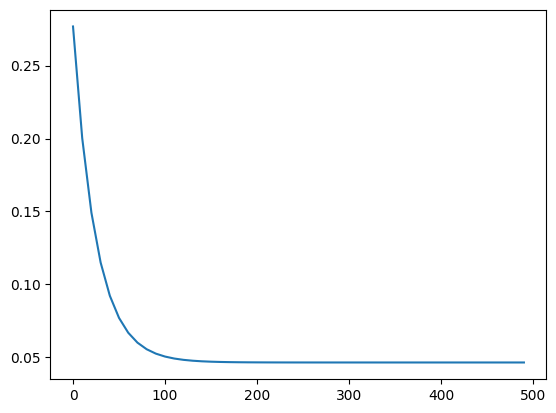

In [ ]:
import matplotlib.pyplot as plt
plt.plot(i_list,cost)

In [ ]:
scaled_X=[0.08827586, 0.25 ]
w=m
scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
scaled_price=scaled_price.reshape(-1,1)
scaler.inverse_transform(scaled_price)


array([[12.80183329]])

In [ ]:
def ran(n):
  rand_val=random.randint(0,n-1)
  return rand_val
ran(6)

3

### SGD model

In [ ]:
# create SGD
import random
def SGradient_decent(x,y,epoch,learning_rate):
  no_of_feature=x.shape[1]
  w= np.ones(no_of_feature)   # weight should be equal to feature
  b=0
  n=x.shape[0]
  cost=[]
  i_list=[]
  for i in range(epoch):
    x=np.array([0.6662069, 0.75     ])
    y=np.array([0.76296296])

    y_pred=np.dot(w,x.T)+b
    print(y_pred)
    
    loss=np.square(y-y_pred)
    y_pred=np.array(y_pred).reshape(1,)
    md=-(2/n)*(x.T.dot(y-y_pred))
    bd=-(2/n)*np.sum(y-y_pred)

    m=w-learning_rate*md
    b=b-learning_rate*bd



    if i%10==0:
      cost.append(loss)
      i_list.append(i)

  return m,b,loss,cost,i_list

# m,b,loss,cost,i_list=SGradient_decent(xs,ys.reshape(ys.shape[0],),500,0.01)

In [ ]:
ys[6]

array([0.76296296])

# ANN 

```
 Image classifcation using keras inbuild data set cifar10
```



### Image classification

#### Import library

In [ ]:
# import libraries 
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


#### Load data

In [ ]:
# load data 
(X_train,y_train),(X_test,y_test)=keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
# checking data 
X_train.shape ,y_train.shape

((50000, 32, 32, 3), (50000, 1))

#### Data Visualtiation

In [ ]:
# plot the data
def plot_data(n):
  plt.figure(figsize=(2,2))
  image =plt.imshow(X_train[n])
  return image


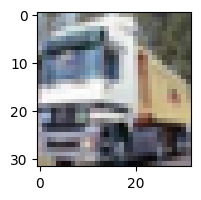

In [ ]:
plot_data(1)

#### Scal the values 

In [ ]:
# preprocess the data
# scal the X data
X_train_scal=X_train/225
X_test_scal=X_test/225

#### One hot encoding for Y 

In [ ]:
# apply one hot encoding for target data
y_train_cat=keras.utils.to_categorical(
    y=y_train,num_classes=10,dtype='float32'
)

y_test_cat=keras.utils.to_categorical(
    y=y_test,num_classes=10,dtype="float32"
)

In [ ]:
y_train_cat[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
y_train[1]

array([9], dtype=uint8)

In [ ]:
classes =["airplane",
          "automobile",
          "bird",
          "cat",
          "deer",
          "dog",
          "frog",
          "horse",
          "ship",
          "truck"]

In [ ]:
classes[y_train[1][0]]

'truck'

In [ ]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

#### Build ANN model

In [ ]:
# build model with multiple hidden layer
im_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [ ]:
# compile the model
im_model.compile(optimizer="SGD",
                 loss="categorical_crossentropy",
                 metrics=["accuracy"])

In [ ]:
# train the model
im_model.fit(X_train_scal,y_train_cat,epochs=5)

In [ ]:
# X_test_scal[0][1]

In [ ]:
# model predcit 
im_model.predict(X_test_scal)


In [ ]:
im_model.predict(X_test_scal)[0]

In [ ]:
classes[y_test[0]]

'truck'

In [ ]:
X_test_scal

In [ ]:
classes[np.argmax(im_model.predict(X_test_scal)[0])]

313/313 [==============================] - 11s 34ms/step


'cat'

In [ ]:
# evaluate the model
im_model.evaluate(X_test_scal,y_test_cat)

313/313 [==============================] - 7s 22ms/step - loss: 1.4567 - accuracy: 0.4756


[1.4566895961761475, 0.475600004196167]

###Image Classification using fashan minist data set




#### Import library

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras


#### Load dataset

In [ ]:
# load data
(X_train,y_train),(X_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train[0],y_train[0]

#### Data normalization

In [ ]:
# normalize data 
X_train_scal=X_train/225
X_test_scal=X_test/225


y_train_cat=keras.utils.to_categorical(
    y=y_train,num_classes=10,dtype="float32")
y_test_cat=keras.utils.to_categorical(
    y=y_test,num_classes=10,dtype="float32")

#### Model build

In [ ]:
# build model
fas_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32*32*3)),
    keras.layers.Dense(4000,activation="relu"),
    keras.layers.Dense(2000,activation="relu"),
    keras.layers.Dense(1000,actiavtion="relu"),
    keras.layers.Dense(500,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

In [ ]:
# model compile
fas_model.compile(organizer="SGD",
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

In [ ]:
# train model
fas_model.fit(X_train_scal,y_train_cat,epochs=50)

In [ ]:
# predict model
fas_model.predict(X_test_scal)

In [ ]:
# evaluate model
fas_model.evaluate(X_test_scal,y_test_cat)

In [ ]:
X_test_scal[0]

In [ ]:
y_test_cat[0]

In [ ]:
classes={
    0:"T-shirt/top",
    1:	"Trouser",
    2:	"Pullover",
    3	:"Dress",
    4:	"Coat",
    5	:"Sandal",
    6:	"Shirt",
    7:	"Sneaker",
    8:	"Bag",
    9:	"Ankle boot"
}

In [ ]:
classes[fas_model.predict(X_test_scal)[0]]

## Customer churn prediction by using ANN

### Tel com churn prediction 




### Import libarary

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow import keras

### Load Dataset

In [ ]:
# load dataset
data=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.sample(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2778,6599-GZWCM,Female,0,No,No,13,Yes,No,Fiber optic,No,...,No,No,No,No,One year,Yes,Mailed check,74.65,966.25,No
4241,2150-UWTFY,Female,0,Yes,Yes,22,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Mailed check,61.15,1422.05,Yes
3412,4854-SSLTN,Male,0,Yes,Yes,2,Yes,No,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,59.50,130.5,No


### Data Cleaning 

In [ ]:
# check data type all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# deop the customer id not required
data.drop("customerID",axis='columns',inplace=True)

In [ ]:
# checjing object values present 
data.columns.dtype=="object"

True

In [ ]:
# check the columns
column=data.columns
val=[]
for col in column:
  if data[col].dtype=="object":
    column=data[col].unique()
    print(f"{col} : {column}")

InternetService : ['DSL' 'Fiber optic' 'No']
StreamingTV : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [ ]:
# if any category more than 2 
cat_val=['InternetService','StreamingTV','Contract','PaymentMethod']
for i in cat_val:
 data=pd.get_dummies(data,columns=[i])


In [ ]:
data.shape

(7043, 29)

In [ ]:
# convert  string into numerical value
data['TotalCharges']=pd.to_numeric(data.TotalCharges,errors='coerce')

In [ ]:
data=data[data.TotalCharges!=' ']

(7043, 20)

In [ ]:
# drop null values
data=data.dropna()

In [ ]:
# change 2 cat into zeros and once
data['gender']=data['gender'].replace({'Female':1,'Male':0})
data['Partner']=data['Partner'].replace({'Yes':1,'No':0})
data['Dependents']=data['Dependents'].replace({'Yes':1,'No':0})
data['PhoneService']=data['PhoneService'].replace({'Yes':1,'No':0})
data['PaperlessBilling']=data['PaperlessBilling'].replace({'Yes':1,'No':0})
data['Churn']=data['Churn'].replace({'Yes':1,'No':0})

data['MultipleLines']=data['MultipleLines'].replace({'Yes':1,'No':0,'No phone service':0})
data['OnlineSecurity']=data['OnlineSecurity'].replace({'Yes':1,'No':0,'No internet service':0})
data['OnlineBackup']=data['OnlineBackup'].replace({'Yes':1,'No':0,'No internet service':0})
data['DeviceProtection']=data['DeviceProtection'].replace({'Yes':1,'No':0,'No internet service':0})
data['TechSupport']=data['TechSupport'].replace({'Yes':1,'No':0,'No internet service':0})
data['TechSupport']=data['TechSupport'].replace({'Yes':1,'No':0,'No internet service':0})
data['StreamingMovies']=data['StreamingMovies'].replace({'Yes':1,'No':0,'No internet service':0})



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [ ]:
data.TotalCharges[:5]

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

### MinMax scaler

In [ ]:
# min max for normalize the value
from sklearn.preprocessing import MinMaxScaler
minmac_col=['tenure','TotalCharges','MonthlyCharges']
scaler=MinMaxScaler()
data[minmac_col]=scaler.fit_transform(data[minmac_col])

In [ ]:
data.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
StreamingTV_No                             0
StreamingTV_No internet service            0
StreamingTV_Yes                            0
Contract_M

In [ ]:
data.shape

(7032, 29)

In [ ]:
X=data.drop('Churn',axis='columns')
y=data['Churn']


### Data split

In [ ]:
# model split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=42)


In [ ]:
X_train.shape

(5484, 28)

### Build model

In [ ]:
# build models
churn_model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(28,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
# modle compile
churn_model.compile(optimizer="adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy"])

In [ ]:
# model train
churn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
172/172 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.7996
Epoch 2/10
172/172 [==============================] - 1s 5ms/step - loss: 0.4133 - accuracy: 0.8076
Epoch 3/10
172/172 [==============================] - 1s 5ms/step - loss: 0.4114 - accuracy: 0.8045
Epoch 4/10
172/172 [==============================] - 1s 5ms/step - loss: 0.4089 - accuracy: 0.8074
Epoch 5/10
172/172 [==============================] - 2s 9ms/step - loss: 0.4083 - accuracy: 0.8089
Epoch 6/10
172/172 [==============================] - 1s 5ms/step - loss: 0.4071 - accuracy: 0.8073
Epoch 7/10
172/172 [==============================] - 0s 3ms/step - loss: 0.4052 - accuracy: 0.8094
Epoch 8/10
172/172 [==============================] - 0s 2ms/step - loss: 0.4035 - accuracy: 0.8111
Epoch 9/10
172/172 [==============================] - 1s 4ms/step - loss: 0.4033 - accuracy: 0.8115
Epoch 10/10
172/172 [==============================] - 1s 4ms/step - loss: 0.4028 - accuracy: 0.8116

In [ ]:
# model predict
y_pred=churn_model.predict(X_test)

49/49 [==============================] - 0s 3ms/step


In [ ]:
y_p=[]
for i in y_pred:
  if i <0.5:
    i=0
  else:
    i=1

  y_p.append(i)

y_p[:6]

[0, 0, 1, 0, 0, 0]

In [ ]:
y_test[:6]

2481    0
6784    0
6125    1
3052    0
4099    0
3223    0
Name: Churn, dtype: int64

In [ ]:
#model evaluate
churn_model.evaluate(X_test,y_test)

49/49 [==============================] - 0s 4ms/step - loss: 0.4304 - accuracy: 0.7946


[0.430431604385376, 0.7945736646652222]

### Classification generation

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1136
           1       0.66      0.47      0.55       412

    accuracy                           0.79      1548
   macro avg       0.74      0.69      0.71      1548
weighted avg       0.78      0.79      0.78      1548



In [ ]:
TP=1037
FP=219
TN=193
FN=99

PRE1=TP/(TP+FP)
PRE2=TN/(TN+FN)

REC1=TP/(TP+FN)
REC2=TN/(TN+FP)

F1_1=2*(PRE1*REC1)/(PRE1+REC1)
F1_2=2*(PRE2*REC2)/(PRE2+REC2)

PRE1,PRE2,REC1,REC2,F1_1,F1_2

(0.8256369426751592,
 0.660958904109589,
 0.9128521126760564,
 0.4684466019417476,
 0.8670568561872909,
 0.5482954545454546)

In [ ]:
y_test.value_counts()

0    1136
1     412
Name: Churn, dtype: int64

Text(50.722222222222214, 0.5, 'true')

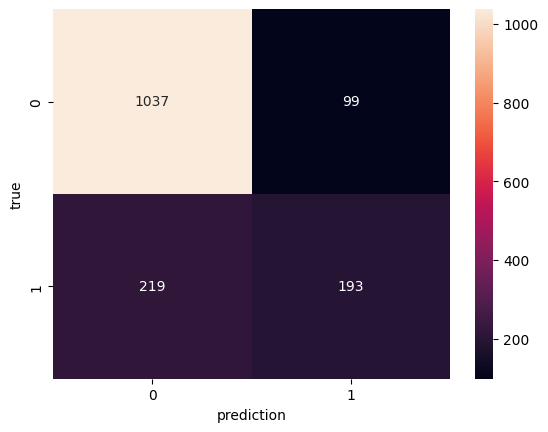

In [ ]:
import tensorflow as tf
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_p)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("prediction")
plt.ylabel('true')

## Bank churn prediction using ANN

### import libarary

In [ ]:
# Import libraries 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

### Load Dataset

In [ ]:
# load data from CSV file
bank_data=pd.read_csv("/content/Bank Customer Churn Prediction.csv")
bank_data.sample(6)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9166,15612103,627,Germany,Female,35,2,137852.96,1,1,1,172269.21,1
3317,15575119,779,France,Male,71,3,0.00,2,1,1,146895.36,1
1036,15668958,521,France,Male,30,2,107316.09,1,1,0,64299.82,0
5228,15791925,751,France,Male,29,10,147737.63,1,0,1,94951.27,0
3460,15641662,470,Germany,Male,39,5,117469.91,2,0,0,63705.90,0
6117,15674928,850,Spain,Male,37,2,0.00,2,1,0,119969.99,0


### Data Cleaning

In [ ]:
# check null values 
bank_data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [ ]:
# check data type 
bank_data.dtypes=="object"

customer_id         False
credit_score        False
country              True
gender               True
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [ ]:
# drop unwanted columns
bank_data.drop('customer_id',axis="columns",inplace=True)

In [ ]:
# check objects
column=bank_data.columns
for i in column:
  if bank_data[i].dtype=="object":
    print(i)


country
gender


In [ ]:
# find unique values
for i in column:
  a=bank_data[i].unique()
  print(f"{i} : {a}")

credit_score : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705

In [ ]:
# preprocess data
bank_data["gender"]=bank_data["gender"].replace({'Female':1,'Male':0})

### One hot encoding 

In [ ]:
# one hot encode or get dummies for country

bank_data=pd.get_dummies(bank_data,columns=['country'])

### Data Normalization

In [ ]:
# data normalize
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
scale_column=['credit_score', 'age', 'tenure', 'balance', 'products_number',
       'estimated_salary']
bank_data[scale_column]=scal.fit_transform(bank_data[scale_column])


In [ ]:
# if any object present filter the values and process the data
bank_data.head()

,credit_score,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_France,country_Germany,country_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [ ]:
bank_data.shape

(10000, 13)

In [ ]:
X=bank_data.drop('churn',axis='columns')
y=bank_data['churn']

### Data Split

In [ ]:
# dat asplit
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=5)

### Build model

In [ ]:
# build a model
model_1=keras.Sequential([
    keras.layers.Dense(5000,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
# compile the model
model_1.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [ ]:
# train the model
model_1.fit(X_train,y_train,epochs=250)

In [ ]:
# predict the value
y_pred=model_1.predict(X_test)

104/104 [==============================] - 0s 2ms/step


In [ ]:
y_pred_new=[]
for i in y_pred:
  if i<0.50:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)


In [ ]:
model_1.evaluate(X_test,y_test)

104/104 [==============================] - 1s 4ms/step - loss: 0.7615 - accuracy: 0.8285


[0.7614855766296387, 0.828484833240509]

In [ ]:
cm=tf.math.confusion_matrix(y_test,y_pred_new)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[2413,  215],
       [ 351,  321]], dtype=int32)>

### Classification report

Text(0.5, 1.0, 'pred vs true')

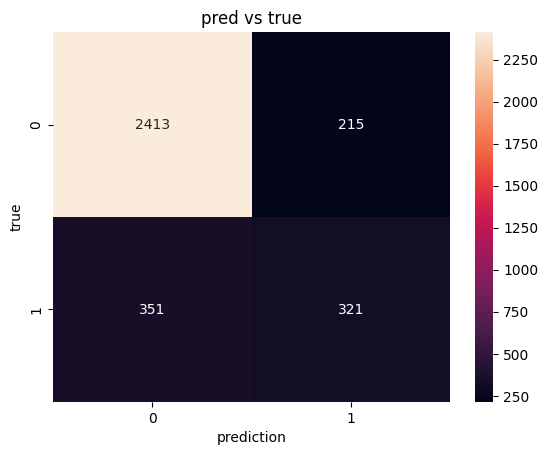

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("prediction")
plt.ylabel('true')
plt.title('pred vs true')

In [ ]:
y_pred_new=[]
for i in model_1.predict(X_test)[7:10]:
  if i<0.50:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

y_pred_new

104/104 [==============================] - 0s 3ms/step


[0, 0, 1]

In [ ]:
y_test[7:10]

5658    1
2065    0
413     1
Name: churn, dtype: int64

### precesion recall 

In [ ]:
TP=2413
FP=351
TN=321
FN=215
PRE1=321/(321+215)
PRE2=2413/(2413+351)

REC1=TP/(TP+FN)
REC2=TN/(TN+FP)

F1_1=2*((PRE1*REC1)/(PRE1+REC1))
F1_2=2*((PRE2*REC2)/(PRE2+REC2))

PRE1,PRE2,REC1,REC2,F1_1,F1_2

(0.5988805970149254,
 0.8730101302460203,
 0.9181887366818874,
 0.47767857142857145,
 0.7249311637675273,
 0.6174897759070146)

## Sampling - imblanced data

In [ ]:
# total 5 methods in sampling 
# under sample
# over sample
# over sample with SMOT
# ensambled method
# Focal loss

In [ ]:
# import data
sam_data=pd.read_csv("/content/Bank Customer Churn Prediction.csv")
sam_data.sample(6)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
1498,15677049,595,Germany,Female,25,7,106570.34,2,0,1,177025.79,0
5388,15669664,574,Germany,Male,54,1,99774.50,1,0,0,4896.11,1
9423,15757385,578,Spain,Female,28,8,161592.76,1,1,0,177834.79,0
9651,15580493,469,France,Male,33,1,127818.52,1,1,0,163477.22,0
5112,15586135,536,Spain,Female,28,4,0.00,1,1,1,136197.65,0
9151,15747974,614,France,Male,49,1,0.00,2,1,0,192440.54,0


In [ ]:
#preprocess the data
# drop customer id 
sam_data.drop("customer_id",axis='columns',inplace=True)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
7652,704,France,Male,24,2,148197.15,2,1,0,182775.08,0
2948,620,France,Female,29,1,138740.24,2,0,0,154700.61,0
7716,684,France,Male,32,9,100249.41,2,0,1,67599.69,0
9838,581,Germany,Male,39,1,121523.51,1,0,0,161655.55,1
7958,686,France,Male,34,6,146178.13,2,1,1,88837.11,0
8124,791,Germany,Female,33,10,130229.71,2,0,0,54019.93,1


In [ ]:
# categoric into numeric
for i in sam_data.columns:
  if sam_data[i].dtype=="float32":
    sam_data[i].unique()

    print(f"{i} : {sam_data[i].unique()}")


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
sam_data.iloc[:,1:2]=le.fit_transform(sam_data.iloc[:,1:2])
sam_data.iloc[:,2:3]=le.fit_transform(sam_data.iloc[:,2:3])
sam_data.sample(6)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
4406,637,1,0,27,7,135842.89,1,1,1,101418.05,0
9449,663,1,1,28,8,123674.28,2,1,1,87985.20,0
7465,666,1,1,30,3,110153.27,1,0,1,74849.46,0
4677,706,1,0,48,10,104478.12,3,0,1,158248.71,1
2604,540,0,1,25,5,116160.23,1,1,0,13411.67,0
117,506,0,0,41,1,0.00,2,1,0,31766.30,0


In [ ]:
# float value and other values need to be normalize
for i in sam_data.columns:
  sam_data[i].unique()


In [ ]:
 sam_data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [ ]:
# apply min max scaler for few large number held fields
from sklearn.preprocessing import MinMaxScaler
scal=MinMaxScaler()
scal_cal=['credit_score', 'age', 'tenure', 'balance',
       'products_number', 'estimated_salary']
sam_data[scal_cal]=scal.fit_transform(sam_data[scal_cal])

In [ ]:
# data split
X=sam_data.drop('churn',axis=1)
y=sam_data["churn"]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=42)

In [ ]:
# normalize the shape
y_train.value_counts()

0    6199
1    1601
Name: churn, dtype: int64

In [ ]:
df_over_0=y_train.value_counts()[0]
df_over_1=y_train.value_counts()[1]


1601

In [ ]:
def data_split_batch(start,end,X,Y):
  x_train=X_train[start:end]
  y_train=y_train[start:end]
  return x_train,y_train

x_train,y_train=data_split_batch(0,1601,X_train,y_train)
x_train.shape,y_train.shape

UnboundLocalError: ignored

# Dropout Regularization

### mines data set to predict if its rock or mines

### import libarary

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras


### Load Dataset

In [ ]:
mr_data=pd.read_csv("/content/sonar.all-data.csv")
mr_data.sample(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
184,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,0.5245,0.5341,0.5554,0.3915,0.2950,0.3075,0.3021,0.2719,0.5443,0.7932,0.8751,0.8667,0.7107,0.6911,0.7287,0.8792,1.0000,0.9816,0.8984,0.6048,0.4934,0.5371,0.4586,0.2908,0.0774,0.2249,0.1602,0.3958,0.6117,0.5196,0.2321,0.4370,0.3797,0.4322,0.4892,0.1901,0.0940,0.1364,0.0906,0.0144,0.0329,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058,M
206,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,0.2720,0.2442,0.1665,0.0336,0.1302,0.1708,0.2177,0.3175,0.3714,0.4552,0.5700,0.7397,0.8062,0.8837,0.9432,1.0000,0.9375,0.7603,0.7123,0.8358,0.7622,0.4567,0.1715,0.1549,0.1641,0.1869,0.2655,0.1713,0.0959,0.0768,0.0847,0.2076,0.2505,0.1862,0.1439,0.1470,0.0991,0.0041,0.0154,0.0116,0.0181,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M
50,0.0131,0.0068,0.0308,0.0311,0.0085,0.0767,0.0771,0.0640,0.0726,0.0901,0.0750,0.0844,0.1226,0.1619,0.2317,0.2934,0.3526,0.3657,0.3221,0.3093,0.4084,0.4285,0.4663,0.5956,0.6948,0.8386,0.8875,0.6404,0.3308,0.3425,0.4920,0.4592,0.3034,0.4366,0.5175,0.5122,0.4746,0.4902,0.4603,0.4460,0.4196,0.2873,0.2296,0.0949,0.0095,0.0527,0.0383,0.0107,0.0108,0.0077,0.0109,0.0062,0.0028,0.0040,0.0075,0.0039,0.0053,0.0013,0.0052,0.0023,R
33,0.0311,0.0491,0.0692,0.0831,0.0079,0.0200,0.0981,0.1016,0.2025,0.0767,0.1767,0.2555,0.2812,0.2722,0.3227,0.3463,0.5395,0.7911,0.9064,0.8701,0.7672,0.2957,0.4148,0.6043,0.3178,0.3482,0.6158,0.8049,0.6289,0.4999,0.5830,0.6660,0.4124,0.1260,0.2487,0.4676,0.5382,0.3150,0.2139,0.1848,0.1679,0.2328,0.1015,0.0713,0.0615,0.0779,0.0761,0.0845,0.0592,0.0068,0.0089,0.0087,0.0032,0.0130,0.0188,0.0101,0.0229,0.0182,0.0046,0.0038,R
170,0.0179,0.0136,0.0408,0.0633,0.0596,0.0808,0.2090,0.3465,0.5276,0.5965,0.6254,0.4507,0.3693,0.2864,0.1635,0.0422,0.1785,0.4394,0.6950,0.8097,0.8550,0.8717,0.8601,0.9201,0.8729,0.8084,0.8694,0.8411,0.5793,0.3754,0.3485,0.4639,0.6495,0.6901,0.5666,0.5188,0.5060,0.3885,0.3762,0.3738,0.2605,0.1591,0.1875,0.2267,0.1577,0.1211,0.0883,0.0850,0.0355,0.0219,0.0086,0.0123,0.0060,0.0187,0.0111,0.0126,0.0081,0.0155,0.0160,0.0085,M


### Data cleaning

In [ ]:
# check null values
mr_data.isnull().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

In [ ]:
mr_data.info()

In [ ]:
y=mr_data.iloc[:,-1]

In [ ]:
# only one value as object so convert into numerical
mr_data=pd.get_dummies(mr_data,drop_first=True)

In [ ]:
mr_data.head(2)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R_R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1


In [ ]:
X=mr_data.drop('R_R',axis='columns')
y=mr_data.iloc[:,-1]

### Train test split

In [ ]:
# train test split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=42)

In [ ]:
X_train.shape,y_test.shape

((161, 60), (46,))

### Model build

In [ ]:
# model build
model1=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation="relu"),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid"),
])

In [ ]:
# model compile
model1.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# model train
# try to over fit
model1.fit(X_train,y_train,epochs=150,batch_size=6)

In [ ]:
# model predict
y_pred=model1.predict(X_test).reshape(-1)

2/2 [==============================] - 0s 9ms/step


In [ ]:
y_pred_new=[]
for i in y_pred:
  if i  < 0.5:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)
y_pred_new[0:6]

[0, 1, 1, 1, 0, 1]

In [ ]:
y_test[0:6]

161    0
15     1
73     1
96     0
166    0
9      1
Name: R_R, dtype: uint8

In [ ]:
model1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 1.6151 - accuracy: 0.8261


[1.6151123046875, 0.8260869383811951]

### over fit model CR 

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test,y_pred_new)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.75      0.83      0.79        18

    accuracy                           0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46



In [ ]:
cm=tf.math.confusion_matrix(y_test,y_pred_new)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[23,  5],
       [ 3, 15]], dtype=int32)>

<Axes: >

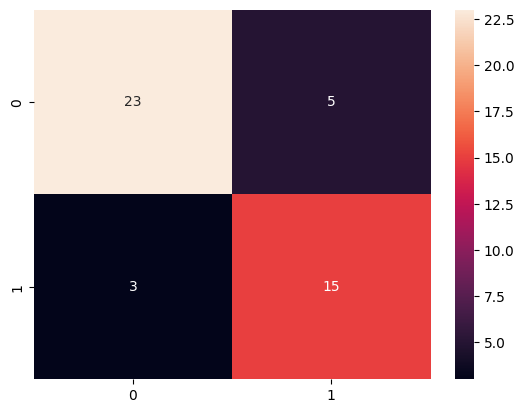

In [ ]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')

### Apply droupout layer build model

In [ ]:
# model build with dropuot
model2=keras.Sequential([
    keras.layers.Dense(60,input_shape=(60,),activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1,activation="sigmoid"),
])


# model compile
model2.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
model2.fit(X_train,y_train,epochs=150,batch_size=6)

In [ ]:
y_pred2=model2.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.8895 - accuracy: 0.7609


[0.8895314335823059, 0.760869562625885]

In [ ]:
y_pred_new=[]
for i in y_pred:
  if i  < 0.5:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)
y_pred_new[0:6]

[0, 1, 1, 1, 0, 1]

In [ ]:
y_test[:6]

161    0
15     1
73     1
96     0
166    0
9      1
Name: R_R, dtype: uint8

# CNN

## Mnist dataset

#### Import required library


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

### Load dataset

In [ ]:
data=keras.datasets.mnist
(Xtrain,ytrain),(Xtest,ytest)=data.load_data()

11490434/11490434 [==============================] - 2s 0us/step


### Data visualization

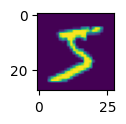

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(Xtrain[0])

### Reshape data and check the shape

In [ ]:
Xtrain.shape

(60000, 28, 28)

In [ ]:
Xtrain=Xtrain/255
Xtest=Xtest/255

In [ ]:
Xtrain.shape,ytrain.shape

((60000, 28, 28), (60000,))

### Build ANN model

In [ ]:
ann=keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(30000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

ann.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
ann.fit(X_train,ytrain,epochs=1)

1875/1875 [==============================] - 23s 10ms/step - loss: 0.4688 - accuracy: 0.8872


In [ ]:
ann.predict(X_test)

313/313 [==============================] - 1s 2ms/step


array([[0.52300245, 0.03143956, 0.5710323 , ..., 0.99989796, 0.32110128,
        0.9292192 ],
       [0.88530093, 0.15952729, 0.99852043, ..., 0.00173275, 0.87662673,
        0.00410606],
       [0.05068415, 0.99481285, 0.7012169 , ..., 0.6424684 , 0.58602065,
        0.28888768],
       ...,
       [0.00526695, 0.01938361, 0.10449757, ..., 0.8539358 , 0.95855665,
        0.99330294],
       [0.38878277, 0.33149472, 0.12418954, ..., 0.06393372, 0.97665364,
        0.12225548],
       [0.9536824 , 0.00220836, 0.9886975 , ..., 0.00143961, 0.5661344 ,
        0.05889427]], dtype=float32)

In [ ]:
ann.evaluate(X_test,ytest)

313/313 [==============================] - 1s 3ms/step - loss: 0.2560 - accuracy: 0.9292


[0.25598153471946716, 0.9291999936103821]

In [ ]:
Xtrain[0].shape

(28, 28)

###**CNN** model **build** 

In [ ]:
cnn = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
tf.config.run_functions_eagerly(True)


In [ ]:
cnn.fit(Xtrain,ytrain,epochs=5)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/5
1875/1875 [==============================] - 60s 32ms/step - loss: 2.3014 - accuracy: 0.1120
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 3/5
1875/1875 [==============================] - 62s 33ms/step - loss: 2.3012 - accuracy: 0.1121
Epoch 4/5
1875/1875 [==============================] - 59s 31ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 5/5
1875/1875 [==============================] - 57s 30ms/step - loss: 2.3011 - accuracy: 0.1124


In [ ]:
cnn.predict(Xtest)

313/313 [==============================] - 2s 6ms/step


array([[0.09850647, 0.10963894, 0.09817113, ..., 0.10495577, 0.09858733,
        0.09889339],
       [0.09853286, 0.10967209, 0.09824529, ..., 0.10487328, 0.09858282,
        0.09885182],
       [0.09849149, 0.10967795, 0.09817439, ..., 0.10490653, 0.09857805,
        0.09887423],
       ...,
       [0.09849748, 0.1096303 , 0.09818147, ..., 0.10492252, 0.09857676,
        0.09890894],
       [0.09852971, 0.1096257 , 0.09816568, ..., 0.10490844, 0.09856068,
        0.09888168],
       [0.09861369, 0.10959518, 0.09823957, ..., 0.10484198, 0.09853468,
        0.09887201]], dtype=float32)

In [ ]:
cnn.evaluate(Xtest,ytest)

313/313 [==============================] - 4s 14ms/step - loss: 2.3009 - accuracy: 0.1135


[2.3008921146392822, 0.11349999904632568]

## Data augumnetation  [Ref link](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/17_data_augmentation/cnn_flower_image_classification_data_augmentations.ipynb)

### Import **library**

In [ ]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

### Load Dataset link

In [ ]:
# load data from tar file
data_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data=tf.keras.utils.get_file("flower_photos",origin=data_url,untar=True,cache_dir=".")

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
#import path lib
data

'./datasets/flower_photos'

### Create path for dataset

In [ ]:
import pathlib
data_dir=pathlib.Path(data)
data_dir

PosixPath('datasets/flower_photos')

### List the image dataset

In [ ]:
list(data_dir.glob('*/*.jpg'))[0:5]

[PosixPath('datasets/flower_photos/sunflowers/2894191705_a1d2d80c80.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/22405887122_75eda1872f_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15460162172_014bcce403.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4746668678_0e2693b1b9_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3568114325_d6b1363497.jpg')]

In [ ]:
len(list(data_dir.glob('*/*.jpg'))) # total image count

3670

In [ ]:
list(data_dir.glob('roses/*.jpg'))[0:5] # * can be anything

[PosixPath('datasets/flower_photos/roses/3560426426_1c66cb8330.jpg'),
 PosixPath('datasets/flower_photos/roses/22506717337_0fd63e53e9.jpg'),
 PosixPath('datasets/flower_photos/roses/3630246240_4fee9a33db.jpg'),
 PosixPath('datasets/flower_photos/roses/17700322054_1c4fdaa034_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4608559939_3487bf3b62_n.jpg')]

### Create a dict output catec

In [ ]:
flow_dict={
    'roses':list(data_dir.glob('roses/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'tulips':list(data_dir.glob('tulips/*.jpg'))

}

In [ ]:
len(flow_dict['sunflowers'])

699

In [ ]:
sunflowers=str(flow_dict['sunflowers'][0])
sunflowers

'datasets/flower_photos/sunflowers/2894191705_a1d2d80c80.jpg'

### Visualize the Dataset

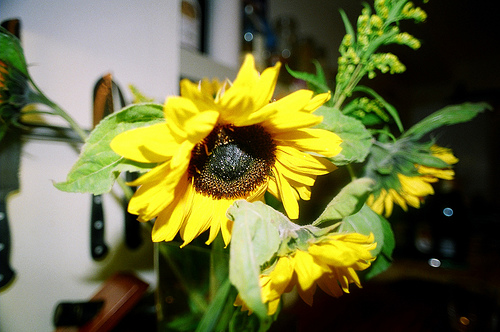

In [ ]:
# image visualization
import PIL
PIL.Image.open(str(sunflowers))

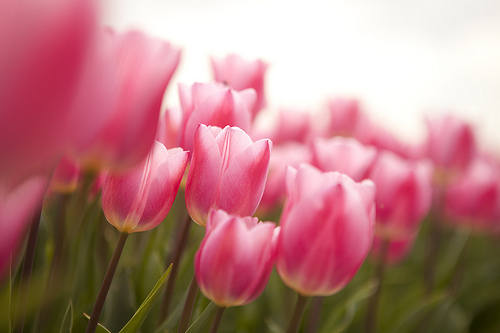

In [ ]:
PIL.Image.open(str(flow_dict['tulips'][2]))

### Image into numpy using cv2

In [ ]:
# image into numpy by using opencv
import cv2
img=cv2.imread(sunflowers)
img.shape

(332, 500, 3)

### Resize the data

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
flower_label_dict={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
}

In [ ]:
X=[]
Y=[]
for flower_name,images in flow_dict.items():
  print(flower_name)
  for i in images:
    img=cv2.imread(str(i))
    resize_img=cv2.resize(img,(180,180))
    Y.append(flower_label_dict[flower_name])
    X.append(resize_img)



roses
sunflowers
daisy
dandelion
tulips


In [ ]:
x=np.array(X)
y=np.array(Y)
x.shape

(3670, 180, 180, 3)

### Train test split

In [ ]:
# train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
X_train[0].shape

(180, 180, 3)

### Normalize the data

In [ ]:
X_train_scal=X_train/255
X_test_scal=X_test/255


In [ ]:
X_train_scal[0].shape

(180, 180, 3)

### Build model CNN

In [ ]:
from tensorflow import keras
cnn=keras.Sequential([
    ## cnn
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
    keras.layers.MaxPool2D(2,2),

    # Dense
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(5) # output value

])

In [ ]:
cnn.compile(optimizer="adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [ ]:
X_train_scal.shape,X_test_scal.shape

((2752, 180, 180, 3), (918, 180, 180, 3))

In [ ]:
y_train.shape,y_test.shape

((2752,), (918,))

In [ ]:
cnn.fit(X_train_scal,y_train,epochs=6)

Epoch 1/6
86/86 [==============================] - 14s 31ms/step - loss: 1.8903 - accuracy: 0.4099
Epoch 2/6
86/86 [==============================] - 3s 33ms/step - loss: 1.0141 - accuracy: 0.6123
Epoch 3/6
86/86 [==============================] - 3s 32ms/step - loss: 0.6741 - accuracy: 0.7525
Epoch 4/6
86/86 [==============================] - 3s 31ms/step - loss: 0.3715 - accuracy: 0.8750
Epoch 5/6
86/86 [==============================] - 3s 31ms/step - loss: 0.1813 - accuracy: 0.9495
Epoch 6/6
86/86 [==============================] - 3s 31ms/step - loss: 0.0768 - accuracy: 0.9804


In [ ]:
cnn.evaluate(X_test_scal,y_test)

29/29 [==============================] - 1s 23ms/step - loss: 2.1364 - accuracy: 0.5773


[2.1364190578460693, 0.5773420333862305]

### Data agumnetation layer

In [ ]:
data_agumentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',
                                                input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(factor=1),
    keras.layers.experimental.preprocessing.RandomZoom(0,1)
])

In [ ]:
cnn_2=keras.Sequential([
    data_agumentation,
    keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
    keras.layers.MaxPool2D(2,2),

    # Dense
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(5) # output value



])

In [ ]:
cnn_2.compile(optimizer="adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

In [ ]:
cnn_2.fit(X_train_scal,y_train,epochs=15)

Epoch 1/15
86/86 [==============================] - 5s 50ms/step - loss: 0.8393 - accuracy: 0.6708
Epoch 2/15
86/86 [==============================] - 4s 49ms/step - loss: 0.8269 - accuracy: 0.6770
Epoch 3/15
86/86 [==============================] - 4s 49ms/step - loss: 0.8526 - accuracy: 0.6701
Epoch 4/15
86/86 [==============================] - 4s 48ms/step - loss: 0.7924 - accuracy: 0.6926
Epoch 5/15
86/86 [==============================] - 4s 49ms/step - loss: 0.7811 - accuracy: 0.7042
Epoch 6/15
86/86 [==============================] - 4s 48ms/step - loss: 0.7688 - accuracy: 0.6988
Epoch 7/15
86/86 [==============================] - 4s 48ms/step - loss: 0.7602 - accuracy: 0.7042
Epoch 8/15
86/86 [==============================] - 4s 49ms/step - loss: 0.7518 - accuracy: 0.7108
Epoch 9/15
86/86 [==============================] - 4s 49ms/step - loss: 0.7506 - accuracy: 0.7144
Epoch 10/15
86/86 [==============================] - 4s 48ms/step - loss: 0.7325 - accuracy: 0.7108
Epoch 11/

In [ ]:
cnn_2.evaluate(X_test_scal,y_test)

29/29 [==============================] - 1s 14ms/step - loss: 0.8970 - accuracy: 0.6786


[0.8969717025756836, 0.6786492466926575]

## Transfer Learning [ Ref link](https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/18_transfer_learning/cnn_transfer_learning.ipynb)

### Import library

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import losses

from PIL import Image
import cv2

import tensorflow_hub as hub

### load pretrained model

In [ ]:
# Load data from pre trained model
data_classifier=Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=(224,224,3))
])

In [ ]:
data_classifier

### New image prediction

In [ ]:
# new image prediction with pretrained model
fish=Image.open("/content/gold_fish_new.jpg")

Convert image into array

In [ ]:
fish_arr=np.array(fish)/255

In [ ]:
fish_arr.shape

(1066, 1600, 3)

Reshape the data

In [ ]:
fish_arr_reshap=np.resize(fish_arr,(224,224,3))

In [ ]:
fish_arr_reshap.shape

(224, 224, 3)

Convert new axis

In [ ]:
fish_arr_reshap[np.newaxis, ...]

array([[[[0.18039216, 0.61176471, 0.23921569],
         [0.17647059, 0.60784314, 0.23529412],
         [0.18431373, 0.61960784, 0.25098039],
         ...,
         [0.05490196, 0.1254902 , 0.13333333],
         [0.03921569, 0.11764706, 0.12156863],
         [0.03529412, 0.11372549, 0.11764706]],

        [[0.03529412, 0.11372549, 0.10980392],
         [0.05098039, 0.12156863, 0.12156863],
         [0.04313725, 0.10588235, 0.10588235],
         ...,
         [0.18823529, 0.4       , 0.44705882],
         [0.18039216, 0.40784314, 0.45490196],
         [0.18039216, 0.40784314, 0.45490196]],

        [[0.18431373, 0.41960784, 0.45882353],
         [0.19607843, 0.43137255, 0.47058824],
         [0.2       , 0.43529412, 0.4745098 ],
         ...,
         [0.78431373, 0.8       , 0.98431373],
         [0.79215686, 0.80784314, 0.99215686],
         [0.79607843, 0.81176471, 0.99607843]],

        ...,

        [[0.0627451 , 0.1254902 , 0.12156863],
         [0.0627451 , 0.1254902 , 0.12156863]

Predict the new value in pretrained

In [ ]:
val=data_classifier.predict(fish_arr_reshap[np.newaxis, ...])
val

1/1 [==============================] - 8s 8s/step


array([[ 0.25887743, -1.0825181 , -1.2413535 , ..., -0.5422944 ,
         1.1517996 , -0.3508286 ]], dtype=float32)

In [ ]:
np.argmax(val)

905

In [ ]:
op=[]
with open("/content/label_txt.txt","r") as f:
  op=f.read().splitlines()
op[0:10]


['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark',
 'electric ray, crampfish, numbfish, torpedo',
 'stingray',
 'cock',
 'hen']

In [ ]:
op[np.argmax(val)]


'window screen'

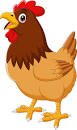

In [ ]:
hen="/content/hen.jpeg"
Image.open(hen)

In [ ]:
import cv2
hen_arr=cv2.imread(hen)

In [ ]:
hen_arr=hen_arr/255

In [ ]:
hen_arr.shape

(130, 77, 3)

In [ ]:
resize_hen=np.resize(hen_arr,(224,224,3))

In [ ]:
resize_hen.shape

(224, 224, 3)

In [ ]:
hen_pred=data_classifier.predict(resize_hen[np.newaxis,...])

1/1 [==============================] - 0s 34ms/step


In [ ]:
op[np.argmax(hen_pred)]

'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus'

### Flower dataset predict pretrained model

In [ ]:
# use flower datset 

In [ ]:

data=tf.keras.utils.get_file("flower_photos",origin="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz",cache_dir='.',untar=True)

### Path identification

In [ ]:
# import pathlib
import pathlib
data_dir=pathlib.Path(data)
data_dir

PosixPath('datasets/flower_photos')

### Label the output data

In [ ]:
flower_fold={
    'daisy':list(data_dir.glob('daisy/*.jpg')),
    'dandelion':list(data_dir.glob('dandelion/*.jpg')),
    'roses':list(data_dir.glob('roses/*.jpg')),
    'sunflowers':list(data_dir.glob('sunflowers/*.jpg')),
    'tulips':list(data_dir.glob('tulips/*.jpg')),
    
} # get jpg list
flower_label={
    'daisy':0,
    'dandelion':1,
    'roses':2,
    'sunflowers':3,
    'tulips':4
    
} # mapp numeric val



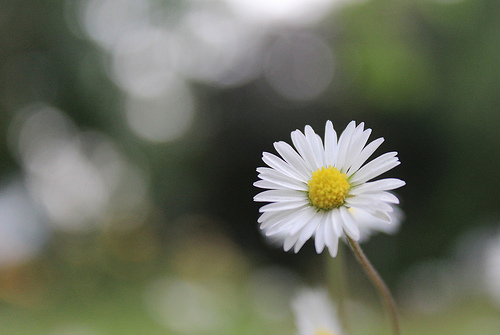

In [ ]:
Image.open(flower_fold['daisy'][8])

### Convert image into array , array resize

In [ ]:
X=[]
y=[]
for flower_name,image in flower_fold.items():
  for i in image:
    image_arr=cv2.imread(str(i))
    image_reshape=cv2.resize(image_arr,(224,224))

    X.append(image_reshape)
    y.append(flower_label[flower_name])



In [ ]:
x=np.array(X)/255
y=np.array(y)/255

In [ ]:
x[0].shape

(224, 224, 3)

### Train test split

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [ ]:
X_train.shape

(2752, 180, 180, 3)

In [ ]:
X_test.shape

(918, 180, 180, 3)

In [ ]:
X_resize=cv2.resize(X[0],(224,244))

In [ ]:
IMAGE_SHAPE=(224,224)
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)


### Predict flower data

In [ ]:
result=data_classifier.predict(np.array([x0_resized,x1_resized,x2_resized]))
result

1/1 [==============================] - 1s 985ms/step


array([[ 0.30111793, -0.9038566 ,  0.9465281 , ..., -2.121015  ,
        -1.9309874 ,  3.8739536 ],
       [ 0.2701713 , -0.6494914 ,  1.563609  , ..., -0.9022023 ,
        -1.754276  ,  4.3482304 ],
       [ 0.39663985,  0.2637809 ,  1.2765619 , ..., -1.157871  ,
        -1.5998132 ,  2.7470806 ]], dtype=float32)

In [ ]:
val=np.argmax(result,axis=1)

In [ ]:
op[val[2]]

'shower curtain'

### Feature model modification 

In [ ]:
# feature model last layer removed model
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [ ]:
feature_model=Sequential([
    hub.KerasLayer(feature_extractor_model,input_shape=(224,224,3))
    
])

### Build pre trained layer with output layer

In [ ]:
# dense layer
cnn_fe=Sequential([
    feature_model,
    layers.Dense(5)
    
])

In [ ]:
cnn_fe.compile(optimizer="adam",
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
cnn_fe.fit(X_train,y_train,epochs=5)

In [ ]:
cnn.evaluate(X_test,y_test)